In [2]:
import numpy as np
from mnist import MNIST
images, labels = MNIST('../../Nptel/Week1_Deep Learning For Visual Learning/MNIST/raw').load_training()
images = np.array(images)
labels = np.array(labels, ndmin=2)
images_test, labels_test = MNIST('../../Nptel/Week1_Deep Learning For Visual Learning/MNIST/raw').load_testing()
images_test=np.array(images_test)
labels_test = np.array(labels_test, ndmin=2)
print(labels.shape)

(1, 60000)


In [3]:
samples=[]
label =[]
for (img,lab) in zip(images, labels[0]):
    if(lab==0 or lab==1):
        samples.append(img)
        label.append(lab)
for (img,lab) in zip(images_test, labels_test[0]):
    if(lab==0 or lab==1):
        samples.append(img)
        label.append(lab)

    

In [4]:
len(label)
samples= np.array(samples)
label= np.array(label)
from sklearn.svm import SVC

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=5)
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
accu=[]
accu_support=[]
i =1
for train_index, test_index in skf.split(samples, label):
    X_train, X_test=samples[train_index], samples[test_index]
    Y_train, Y_test=label[train_index],label[test_index]
    clf = SVC(kernel='linear')
    clf.fit(X_train,Y_train)
    support_indices=clf.support_
    Support_vectors=[]
    Support_lables=[]
    print len(support_indices)
    for i in support_indices:
        Support_vectors.append(samples[i])
        Support_lables.append(label[i])
    clf2 = SVC(kernel='linear', max_iter=500)
    clf2.fit(Support_vectors, Support_lables)
    print len(clf2.support_)
    predict= clf.predict(X_test)
    predict2 = clf2.predict(X_test)
    acc = accuracy_score(predict,Y_test)
    acc2 = accuracy_score(predict2, Y_test)
    accu.append(acc)
    accu_support.append(acc2)
    print str(i) + " fold completed"

    

77
20
11372 fold completed
84
28
11741 fold completed
75
35
11373 fold completed
77
58
11374 fold completed
84
84


/home/mohit/anaconda2/envs/my_env/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


11410 fold completed


In [25]:
print "ACC: ",accu,"\n", "ACC_SV: ",accu_support

ACC:  [0.9986472776462632, 0.9983090970578289, 0.9976319350473613, 0.9986463620981387, 0.9993231810490694] 
ACC_SV:  [0.9972945552925262, 0.9915454852891444, 0.9925575101488497, 0.9986463620981387, 0.9993231810490694]


In [13]:
mean_trained_whole_dataset = np.mean(np.array(accu))
mean_trained_support_vectors= np.mean(np.array(accu_support))
std_trained_whole_dataset = np.std(np.array(accu))
std_trained_support_vectors=np.std(np.array(accu_support))


In [14]:
print "Mean (trained on whole Dataset) : ", mean_trained_whole_dataset, "Std (trained on whole dataset) : ", std_trained_whole_dataset
print "Mean (trained on Support Vectors) : ", mean_trained_support_vectors, "Std (trained on Support Vectors) : ", std_trained_support_vectors


Mean (trained on whole Dataset) :  0.9985115705797323 Std (trained on whole dataset) :  0.0005495545308993313
Mean (trained on Support Vectors) :  0.9958734187755457 Std (trained on Support Vectors) :  0.0032042459861048736


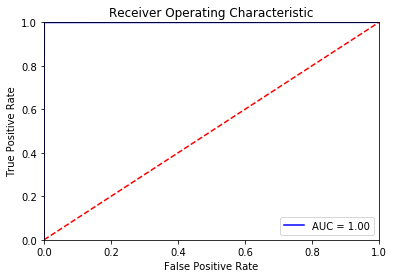

In [20]:
from sklearn.metrics import roc_curve
preds = clf.predict(X_test)
# preds = probs_wo[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


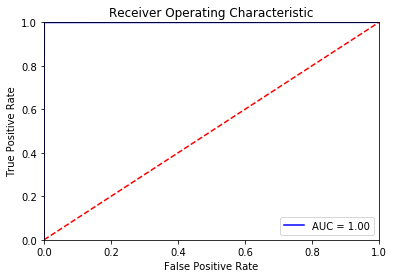

In [21]:
from sklearn.metrics import roc_curve
preds_2 = clf2.predict(X_test)
# preds = probs_wo[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds_2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()